<a href="https://colab.research.google.com/github/ji0-k/AI_26/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 럭키팩에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키팩에 확율을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 무게, 크기(길이, 대각선, 높이, 두께)

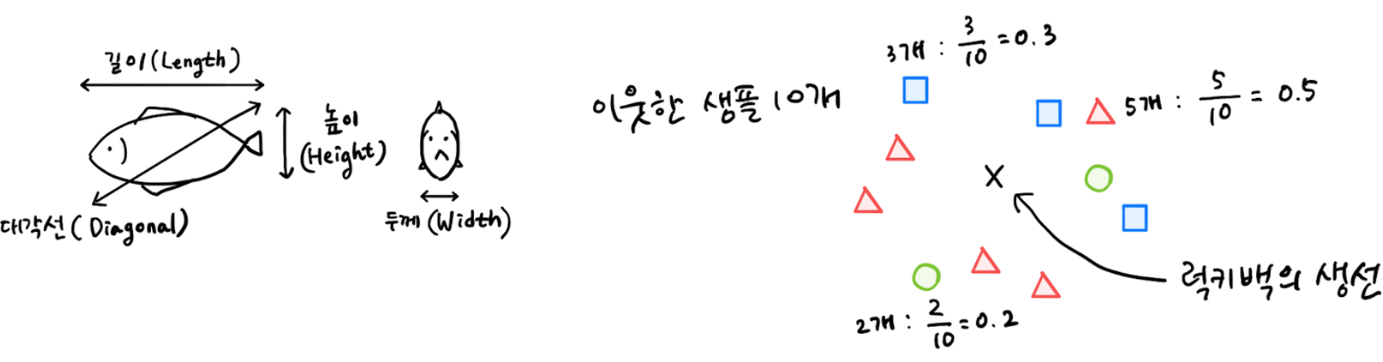

In [1]:
# 확률을 알고 싶은 것이기 때문에 로지스틱 회귀 사용 : 럭키백 확률
# 샘플데이터 준비

import pandas as pd # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈), 무게, 길이, 대각선, 키, 두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력 (0~4)

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy() #정답파일은 1차원배열
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


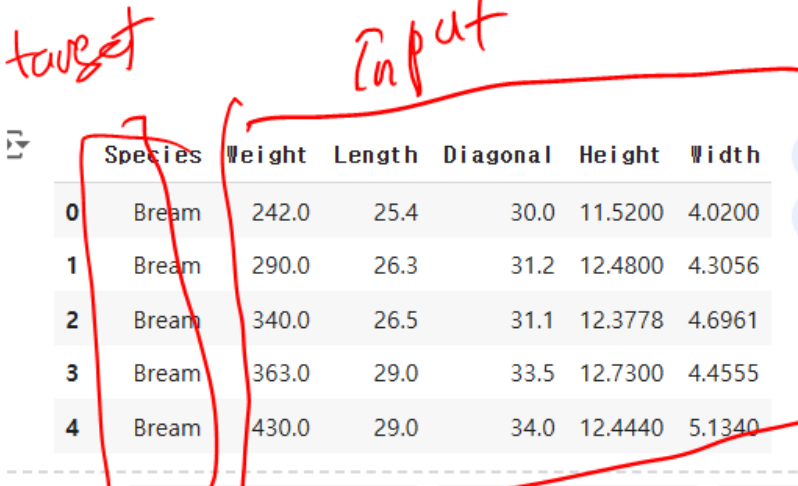

In [10]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print(f"훈련용 (데이터수, 특성개수) {train_input.shape},시험용(데이터수, 특성개수) {test_input.shape}")

훈련용 (데이터수, 특성개수) (119, 5),시험용(데이터수, 특성개수) (40, 5)


In [13]:
from sklearn.preprocessing import StandardScaler
# 표준점수는 데이터의 범위 (스케일조정) = (값-평균)/표준편차
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [14]:
# K-최근접이웃분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier # 분류용
kn = KNeighborsClassifier(n_neighbors=3) # 이웃 3점 참고
kn.fit(train_scaled, train_target)

print(f"훈련점수 : {kn.score(train_scaled, train_target)}") # 훈련점수 89.07%
print(f"시험점수 : {kn.score(test_scaled, test_target)}")   # 테스트 점수 85.00%

훈련점수 : 0.8907563025210085
시험점수 : 0.85
